# Illustration of open cell Stratocumulus network dynamics

This notebook illustrates one timestep of the network dynamics describing open cell Stratocumulus clouds. It corresponds to Figure 2 (e) and Supplementary Figure S3 (j-p) in Glassmeier & Feingold (2017).

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys, pickle
import random as rand
import pyvoro as pv
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (4, 4)
if '..' not in sys.path: sys.path.append('..')
import trafo
import scar

In [2]:
XMAX = YMAX = 800
PERIODIC = True

## Prepare an initial network

Create an initial network using cell centers from a large-eddy simulation of Stratocumulus cloud cells.

In [3]:
%%time

# load coordinates of cell centers from file
centers = pickle.load(open('cell_centers_IC.p', 'rb'))

# perform Voronoi tesselation based on cell centers
vor = pv.compute_2d_voronoi(centers, [[0, XMAX], [0, YMAX]], max(XMAX, YMAX), periodic=[PERIODIC, PERIODIC])

# convert Voronoi tesselation into cellular network data structure (use x<150, y<150 for visualization)
G = trafo.create_graph_from_vor(vor, periodic=PERIODIC, xmin=0, xmax=150, ymin=0, ymax=150)
Gini = G.copy()

CPU times: user 36 s, sys: 230 ms, total: 36.2 s
Wall time: 36.2 s


## Open cell evolution

Apply the open cell evolution to a 6-sided cell in the lower left corner (x<150, y<150) of the network.
Show the triangulation (dual network) before, after and for all intermediate steps (by setting debug=True) of the open cell evolution.

celldivision: initial graph


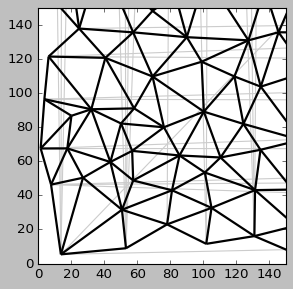

celldivision: inserted new vertex


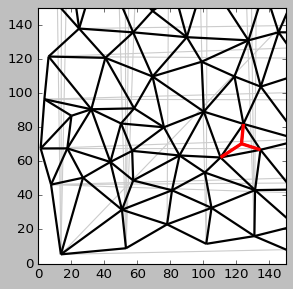

celldivision: inserted new vertex


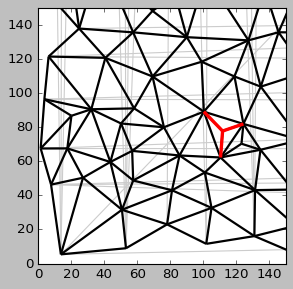

celldivision: edge flipped


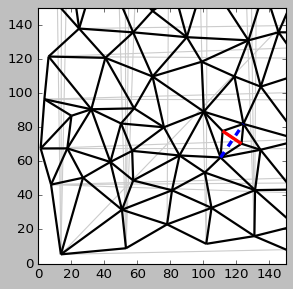

celldivision: edge flipped


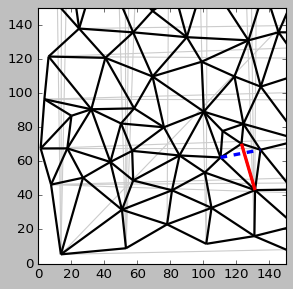

celldivision: edge flipped


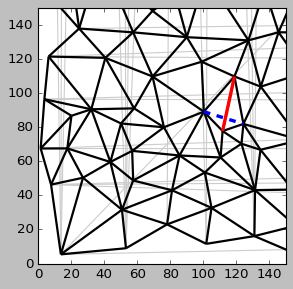

celldivision: done
multicollapsemerge: initial graph


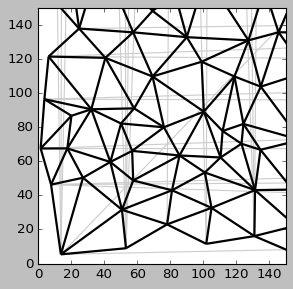

multireduction: entering
multireduction: edge flipped


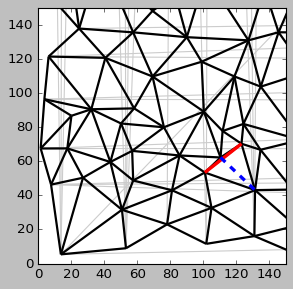

multireduction: edge flipped


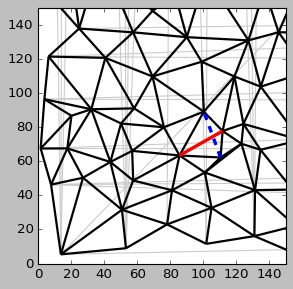

multireduction: edge flipped


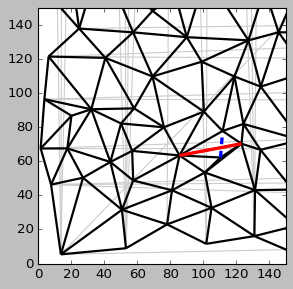

multireduction: done
multicollapsemerge: node removed


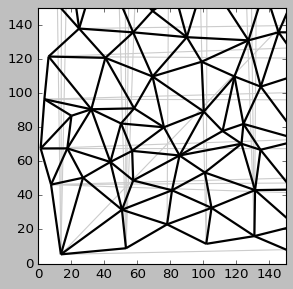

multicollapsemerge: done
multicollapsemerge: initial graph


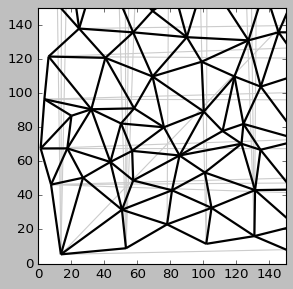

multireduction: entering
multireduction: edge flipped


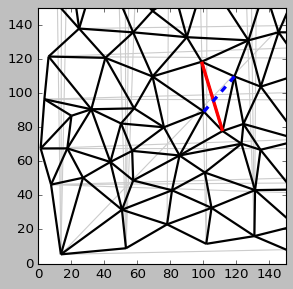

multireduction: edge flipped


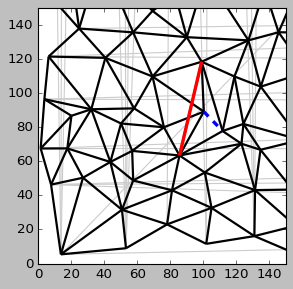

multireduction: edge flipped


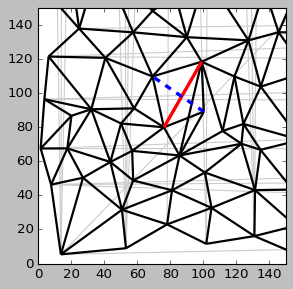

multireduction: done
multicollapsemerge: node removed


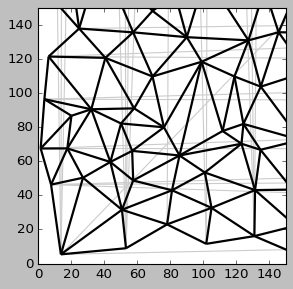

multicollapsemerge: done


True

In [4]:
nodes = [n for n in Gini.nodes() if Gini.degree(n)==6 
                              and (Gini.edges(n, data=True)[0][2]['coords'][0][0]<150)
                              and (Gini.edges(n, data=True)[0][2]['coords'][0][1]<150)]
rand.seed(531)
trafo.doublecycle(G, nodes[1], periodic=PERIODIC, preferential=True, collapsize=6, debug=True)

## Show the topological scar (sidedness difference) of the open cell evolution

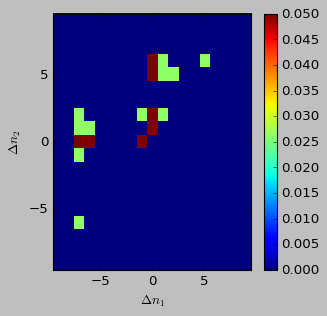

In [5]:
scar.plot_degree_difference_histogram(*scar.degree_difference_stat(scar.degree_difference_graph(G, Gini)))